In [177]:
# El sistema de Lorentz:
# dx/dt = sigma * (y - x)
# dy/dt = x * (rho - z) - y
# dz/dt = x * y - beta * z

In [180]:
import numpy as np
import matplotlib.pyplot as plt

# funciones del sistema de Lorentz
def x_prima(x,y,z):
    return sigma*(y-x)

def y_prima(x,y,z):
    return x*(rho-z)-y

def z_prima(x,y,z):
    return x*y-z*beta

# parametros del sistema
sigma = 10
rho = 28
beta = 8/3

In [181]:
def RK4_ecdif(a, b, h, inicial):
    '''
    Metodo de Runge-Kutta de orden 4
    Para sistema de lorentz
    :param a: extremo inicial del intervalo analizado
    :param b: extremo final del intervalo analizado
    :param h: tamaño de paso
    :param w0: valor inicial
    :return:
    x,y,z: vector con los valores de la variable calculados
    '''
    t = np.arange(a, b + h, h)
    n = len(t)
    x = np.zeros(n)
    y = np.zeros(n)
    z = np.zeros(n)
    w0 = inicial
    x[0] = w0[0]
    y[0] = w0[1]
    z[0] = w0[2]
    for i in range(n-1):
        k11 = x_prima(x[i],y[i],z[i])
        k12 = y_prima(x[i],y[i],z[i])
        k13 = z_prima(x[i],y[i],z[i])
        k21 = x_prima(x[i]+ (h/2)*k11, y[i]+(h/2)*k12, z[i]+(h/2)*k13)
        k22 = y_prima(x[i]+ (h/2)*k11, y[i]+(h/2)*k12, z[i]+(h/2)*k13)
        k23 = z_prima(x[i]+ (h/2)*k11, y[i]+(h/2)*k12, z[i]+h/2*k13)
        k31 = x_prima(x[i]+ (h/2)*k21, y[i]+(h/2)*k22, z[i]+h/2*k23)
        k32 = y_prima(x[i]+ (h/2)*k21, y[i]+(h/2)*k22, z[i]+h/2*k23)
        k33 = z_prima(x[i]+ (h/2)*k21, y[i]+(h/2)*k22, z[i]+h/2*k23)
        k41 = x_prima(x[i]+ (h*k31), y[i]+h*k32 ,z[i]+h*k33)
        k42 = y_prima(x[i]+ (h*k31), y[i]+h*k32 ,z[i]+h*k33)
        k43 = z_prima(x[i]+ (h*k31), y[i]+h*k32 ,z[i]+h*k33)
        x[i+1] = x[i] + h/6*(k11 + 2*k21 + 2*k31 + k41)
        y[i+1] = y[i] + h/6*(k12 + 2*k22 + 2*k32 + k42)
        z[i+1] = z[i] + h/6*(k13 + 2*k23 + 2*k33 + k43)
    return x,y,z

In [186]:
# intervalo 0
a0 = 0.0
b0 = 25
h0 = 0.01
inicial0 = [0.1,0.1,0.1]
x0,y0,z0 = RK4_ecdif(a0, b0, h0, inicial0)

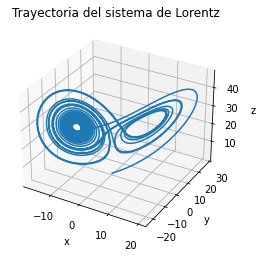

In [188]:
# Graficamos la trayectoria (x(t),y(t),z(t)) del sistema
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x0,y0,z0)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Trayectoria del sistema de Lorentz')
plt.show()

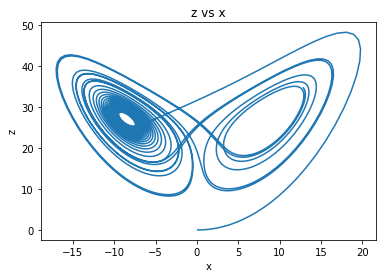

In [189]:
plt.plot(x0,z0)
plt.title("z vs x")
plt.xlabel("x")
plt.ylabel("z")
plt.show()

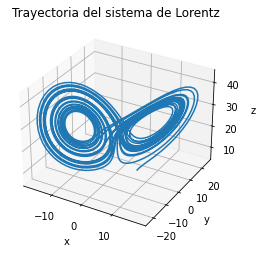

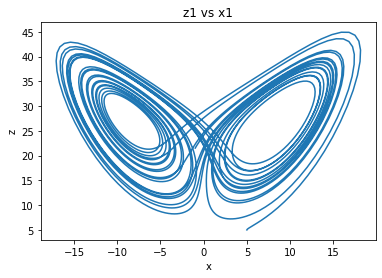

In [190]:
# intervalo 1
a1 = 25
b1 = 50
h1 = 0.01
inicial1 = [5,5,5]
x1,y1,z1 = RK4_ecdif(a1, b1, h1, inicial1)
# Graficamos la trayectoria (x(t),y(t),z(t)) del sistema
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x1,y1,z1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Trayectoria del sistema de Lorentz')
plt.show()
plt.plot(x1,z1)
plt.title("z1 vs x1")
plt.xlabel("x")
plt.ylabel("z")
plt.show()

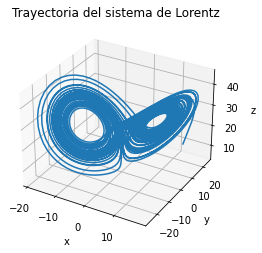

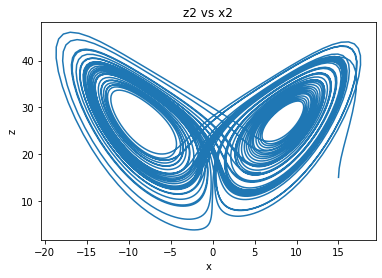

In [191]:
# intervalo 2
a2 = 50
b2 = 100
h2 = 0.01
inicial2 = [15,15,15]
x2,y2,z2 = RK4_ecdif(a2, b2, h2, inicial2)
# Graficamos la trayectoria (x(t),y(t),z(t)) del sistema
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x2,y2,z2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Trayectoria del sistema de Lorentz')
plt.show()
plt.plot(x2,z2)
plt.title("z2 vs x2")
plt.xlabel("x")
plt.ylabel("z")
plt.show()

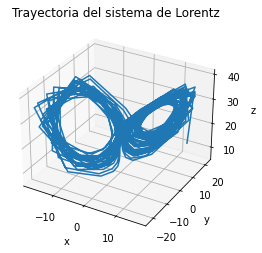

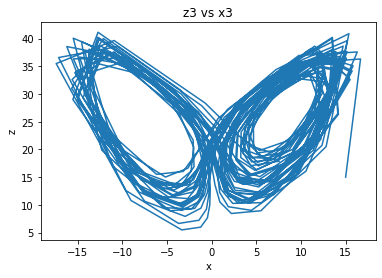

In [193]:
# intervalo 2, aumento de paso(h)
a2 = 50
b2 = 100
h3 = 0.1 # cambio de paso
inicial2 = [15,15,15]
x3,y3,z3 = RK4_ecdif(a2, b2, h3, inicial2)
# Graficamos la trayectoria (x(t),y(t),z(t)) del sistema
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x3,y3,z3)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Trayectoria del sistema de Lorentz')
plt.show()
plt.plot(x3,z3)
plt.title("z3 vs x3")
plt.xlabel("x")
plt.ylabel("z")
plt.show()

In [207]:
def pred_corr(a, b, h, inicial):
    '''
    Metodo de Runge-Kutta de orden 4, para obtener los primeros cuatro valores
    Método Adams-Bashforth de 4 pasos para obtener el valor predicho de yk+1
    Método Adams-Moulton de 3 pasos para obtener el valor corregido de yk+1
    
    :param a: extremo inicial del intervalo analizado
    :param b: extremo final del intervalo analizado
    :param h: tamaño de paso
    :param w0: valor inicial
    :return:
    x,y,z: vector con los valores de la variable calculados
    '''
    t = np.arange(a, b + h, h)
    n = len(t)
    x = np.zeros(n)
    y = np.zeros(n)
    z = np.zeros(n)
    w0 = inicial
    x[0] = w0[0]
    y[0] = w0[1]
    z[0] = w0[2]
    for i in range(n):
        if i<= 3:
            k11 = x_prima(x[i],y[i],z[i])
            k12 = y_prima(x[i],y[i],z[i])
            k13 = z_prima(x[i],y[i],z[i])
            k21 = x_prima(x[i]+ (h/2)*k11, y[i]+(h/2)*k12, z[i]+(h/2)*k13)
            k22 = y_prima(x[i]+ (h/2)*k11, y[i]+(h/2)*k12, z[i]+(h/2)*k13)
            k23 = z_prima(x[i]+ (h/2)*k11, y[i]+(h/2)*k12, z[i]+h/2*k13)
            k31 = x_prima(x[i]+ (h/2)*k21, y[i]+(h/2)*k22, z[i]+h/2*k23)
            k32 = y_prima(x[i]+ (h/2)*k21, y[i]+(h/2)*k22, z[i]+h/2*k23)
            k33 = z_prima(x[i]+ (h/2)*k21, y[i]+(h/2)*k22, z[i]+h/2*k23)
            k41 = x_prima(x[i]+ (h*k31), y[i]+h*k32 ,z[i]+h*k33)
            k42 = y_prima(x[i]+ (h*k31), y[i]+h*k32 ,z[i]+h*k33)
            k43 = z_prima(x[i]+ (h*k31), y[i]+h*k32 ,z[i]+h*k33)
            x[i+1] = x[i] + h/6*(k11 + 2*k21 + 2*k31 + k41)
            y[i+1] = y[i] + h/6*(k12 + 2*k22 + 2*k32 + k42)
            z[i+1] = z[i] + h/6*(k13 + 2*k23 + 2*k33 + k43)
        else:
            '''Adams-Bashforth de 4 pasos para obtener el valor predicho'''
            x1 = x_prima(x[i-1],y[i-1],z[i-1])
            x2 = x_prima(x[i-2],y[i-2],z[i-2])
            x3 = x_prima(x[i-3],y[i-3],z[i-3])
            x4 = x_prima(x[i-4],y[i-4],z[i-4])
            
            y1 = y_prima(x[i-1],y[i-1],z[i-1])
            y2 = y_prima(x[i-2],y[i-2],z[i-2])
            y3 = y_prima(x[i-3],y[i-3],z[i-3])
            y4 = y_prima(x[i-4],y[i-4],z[i-4])
            
            z1 = z_prima(x[i-1],y[i-1],z[i-1])
            z2 = z_prima(x[i-2],y[i-2],z[i-2])
            z3 = z_prima(x[i-3],y[i-3],z[i-3])
            z4 = z_prima(x[i-4],y[i-4],z[i-4])
            
            x[i] = x[i-1] + h/24 * (55*x1 - 59*x2 + 37*x3 - 9*x4)
            y[i] = y[i-1] + h/24 * (55*y1 - 59*y2 + 37*y3 - 9*y4)
            z[i] = z[i-1] + h/24 * (55*z1 - 59*z2 + 37*z3 - 9*z4)
            
            '''Adams-Moulton de 3 pasos para obtener el valor corregido'''
            xc1 = x_prima(x[i],y[i],z[i])
            xc2 = x_prima(x[i-1],y[i-1],z[i-1])
            xc3 = x_prima(x[i-2],y[i-2],z[i-2])
            xc4 = x_prima(x[i-3],y[i-3],z[i-3])
            
            yc1 = y_prima(x[i],y[i],z[i])
            yc2 = y_prima(x[i-1],y[i-1],z[i-1])
            yc3 = y_prima(x[i-2],y[i-2],z[i-2])
            yc4 = y_prima(x[i-3],y[i-3],z[i-3])
            
            zc1 = z_prima(x[i],y[i],z[i])
            zc2 = z_prima(x[i-1],y[i-1],z[i-1])
            zc3 = z_prima(x[i-2],y[i-2],z[i-2])
            zc4 = z_prima(x[i-3],y[i-3],z[i-3])
            
            x[i] = x[i-1] + h/24 *(9*xc1 + 19*xc2 - 5*xc3 + xc4)
            
            y[i] = y[i-1] + h/24 * (9*yc1 + 19*yc2 - 5*yc3 + yc4)
           
            z[i] = z[i-1] + h/24 * (9*zc1 + 19*zc2 - 5*zc3 + zc4)
    return x,y,z

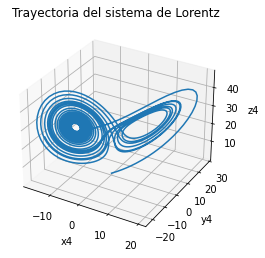

In [208]:
x4,y4,z4 = pred_corr(a0, b0, h0, inicial0)
# Graficamos la trayectoria (x(t),y(t),z(t)) del sistema
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x4,y4,z4)
ax.set_xlabel('x4')
ax.set_ylabel('y4')
ax.set_zlabel('z4')
ax.set_title('Trayectoria del sistema de Lorentz')
plt.show()

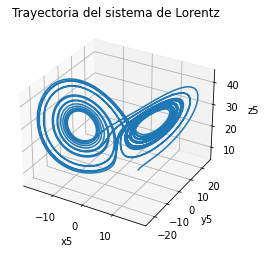

In [209]:
x5,y5,z5 = pred_corr(a1, b1, h1, inicial1)
# Graficamos la trayectoria (x(t),y(t),z(t)) del sistema
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x5,y5,z5)
ax.set_xlabel('x5')
ax.set_ylabel('y5')
ax.set_zlabel('z5')
ax.set_title('Trayectoria del sistema de Lorentz')
plt.show()

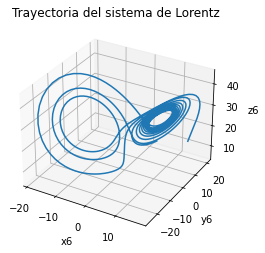

In [210]:
x6,y6,z6 = pred_corr(a2, b2, h2, inicial2)
# Graficamos la trayectoria (x(t),y(t),z(t)) del sistema
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x6,y6,z6)
ax.set_xlabel('x6')
ax.set_ylabel('y6')
ax.set_zlabel('z6')
ax.set_title('Trayectoria del sistema de Lorentz')
plt.show()

In [ ]:
#obs: Los metodos expuestos en el ejercicio 1 son aplicados en las funciones del ejercicio 2